![Colegio Bourbaki](./Images/Bourbaki.png)

## Procesamiento de Lenguaje Natural

### Modelos Generativos: introducción

Los Modelos Generativos de Lenguaje Natural (NLP, por sus siglas en inglés) constituyen una rama apasionante y en constante evolución dentro del campo de la inteligencia artificial y el procesamiento del lenguaje natural. Estos modelos son diseñados con el propósito de entender, modelar y generar texto de manera autónoma, imitando la complejidad y la riqueza del lenguaje humano. Su aplicación abarca desde la generación de texto creativo hasta la traducción automática y la respuesta inteligente en sistemas de asistencia virtual.

En el núcleo de estos modelos se encuentran las redes neuronales, en particular, arquitecturas como los Recurrent Neural Networks (RNNs), Long Short-Term Memory Networks (LSTMs), y más recientemente, los modelos de atención y los transformers. Estos modelos, entrenados con grandes conjuntos de datos textuales, aprenden patrones lingüísticos y relaciones semánticas, permitiéndoles comprender la estructura y el significado del lenguaje.

Uno de los hitos más significativos en el desarrollo de modelos generativos de lenguaje natural ha sido la introducción de los transformers, que han demostrado ser altamente eficientes para modelar dependencias a largo plazo en secuencias de texto y han dado lugar a modelos preentrenados masivamente como GPT (Generative Pre-trained Transformer) y BERT (Bidirectional Encoder Representations from Transformers).

Estos modelos preentrenados, en particular GPT, han capturado la atención de la comunidad científica y la industria debido a su capacidad para generar texto coherente y contextualmente relevante. Los enfoques autoregresivos utilizados por GPT permiten la generación de texto palabra por palabra, condicionado por el contexto previo, lo que resulta en salidas sorprendentemente coherentes y contextualmente adecuadas.

A medida que los modelos generativos de lenguaje natural continúan avanzando, su aplicación se extiende a campos como la redacción automática de contenido, la asistencia en la creación de diálogos y la mejora de la comprensión y la generación de texto en varios idiomas. Estos modelos están desempeñando un papel crucial en la evolución de las capacidades de procesamiento del lenguaje natural, acercándonos cada vez más a la creación de sistemas que pueden interactuar de manera más intuitiva y natural con el lenguaje humano.

**En la presente notebook, nos encargaremos de generar textos con un modelo predictivo simple aproximando la distribución de palabras de un texto.**

### Librerias

In [1]:
#Utils
from collections import Counter
import numpy as np
import operator
import random
import re
import requests

#Plotting
import matplotlib.pyplot as plt

In [2]:
def read_book(url):
    """Lee un archivo en formato txt y retorna su contenido como una cadena de texto."""
    response = requests.get(url)
    if response.status_code == 200:
        # Access the content of the response
        text = response.text
        return text
    else:
        print(f"Failed to fetch the file. Status code: {response.status_code}")

In [3]:
# stopwords = pd.read_csv('https://gist.githubusercontent.com/cr0wg4n/78554c5d0afa9944d2fa3a4435d83a57/raw/df59fb916108f2a58bf1a3d8c62818b44231586d/spanish-stop-words.txt', header=None)
# stopwords_list = stopwords[0].tolist()
# print(stopwords_list, len(stopwords_list))

In [4]:
def preprocessing(text):
    # convierte a minúsculas
    text = text.lower()

    # elimina stopwords
    # stop = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
    # text = stop.sub('', text)

    # Quitar puntuación y números
    text = re.sub("[^ña-záéíóúü]+", " ", text)

    return text

In [5]:
def obtain_ngrams(text, N):
    """Genera n-gramas a partir de un texto."""
    words_in_text = text.split()
    ngrams = [
        tuple(words_in_text[i : i + N]) for i in range(len(words_in_text) - N + 1)
    ]
    return ngrams

### Carga de datos

Usaremos la novela 'El nombre de la Rosa' de Umberto Eco. Pueden encontrar más libros en: https://github.com/busiris2014/7506Condor1C2014/tree/master/datos2011/trunk/libros

In [6]:
book = read_book(
    "https://raw.githubusercontent.com/busiris2014/7506Condor1C2014/master/datos2011/trunk/libros/Umberto%20Eco%20-%20El%20Nombre%20de%20la%20Rosa.txt"
)

In [7]:
book

'Umberto Eco\r\nEl Nombre de la Rosa\r\n\r\n\r\n\r\nTraducción de Ricardo Pochtar\r\n\r\n\r\nEDITORIAL LUMEN\r\nEDICIONES DE LA FLOR\r\n\r\n\r\nPROLOGO\r\nPRIMER DIA\r\nPrima. Donde se llega al pie de la abadía y Guillermo da pruebas de gran agudeza\r\nTercia. Donde Guillermo mantiene una instructiva conversación con el Abad Sexta. Donde Adso admira la portada de la iglesia y Guillermo reencuentra a Ubertino da Casale\r\nHacia nona. Donde Guillermo tiene un diálogo muy erudito con Severino el herbolario\r\nDespués de nona. Donde se visita el scriptorium y se conoce a muchos estudiosos, copistas y rubricantes así como a un anciano ciego que espera al Anticristo\r\nVísperas. Donde se visita el resto de la abadía, Guillermo extrae algunas conclusiones sobre la muerte de Adelmo, y se habla con el hermano vidriero sobre los vidrios para leer y sobre los fantasmas para los que quieren leer demasiado\r\nCompletas. Donde Guillermo y Adso disfrutan de la amable hospitalidad del Abad y de la air

### Preprocesamiento

Vamos convertir en minúsculas, a retirar los espacios, puntuaciones y números.

In [8]:
book_processed = preprocessing(book)

In [9]:
book_processed

'umberto eco el nombre de la rosa traducción de ricardo pochtar editorial lumen ediciones de la flor prologo primer dia prima donde se llega al pie de la abadía y guillermo da pruebas de gran agudeza tercia donde guillermo mantiene una instructiva conversación con el abad sexta donde adso admira la portada de la iglesia y guillermo reencuentra a ubertino da casale hacia nona donde guillermo tiene un diálogo muy erudito con severino el herbolario después de nona donde se visita el scriptorium y se conoce a muchos estudiosos copistas y rubricantes así como a un anciano ciego que espera al anticristo vísperas donde se visita el resto de la abadía guillermo extrae algunas conclusiones sobre la muerte de adelmo y se habla con el hermano vidriero sobre los vidrios para leer y sobre los fantasmas para los que quieren leer demasiado completas donde guillermo y adso disfrutan de la amable hospitalidad del abad y de la airada conversación de jorge segundo dia maitines donde pocas horas de místic

In [10]:
len(book_processed)

1084408

### Distribución de palabras

In [11]:
unigrams = Counter(
    book_processed.split()
)  # unigramas hace referencia a una sola palabra

Mostraremos las 20 palabras más frecuentes.

In [12]:
unigrams.most_common(20)

[('de', 9746),
 ('que', 7411),
 ('la', 6369),
 ('y', 6074),
 ('el', 4564),
 ('en', 4380),
 ('a', 3822),
 ('los', 3594),
 ('no', 2597),
 ('se', 2288),
 ('por', 2066),
 ('las', 1897),
 ('un', 1896),
 ('con', 1823),
 ('del', 1716),
 ('lo', 1698),
 ('una', 1514),
 ('pero', 1272),
 ('para', 1249),
 ('como', 1166)]

In [13]:
vocabulary = list(unigrams.keys())
print("Palabras en el vocabulario: ", len(vocabulary))

Palabras en el vocabulario:  20290


Visualizaremos la probabilidad de ocurrencia de las 100 palabras más frecuentes

In [14]:
K = 100

In [15]:
word_probability = {
    k: v / len(vocabulary) for k, v in unigrams.most_common(K)
}  # Dict comprehension

In [16]:
# Sorting the probabilities
x, y = zip(*sorted(word_probability.items(), key=operator.itemgetter(1), reverse=True))

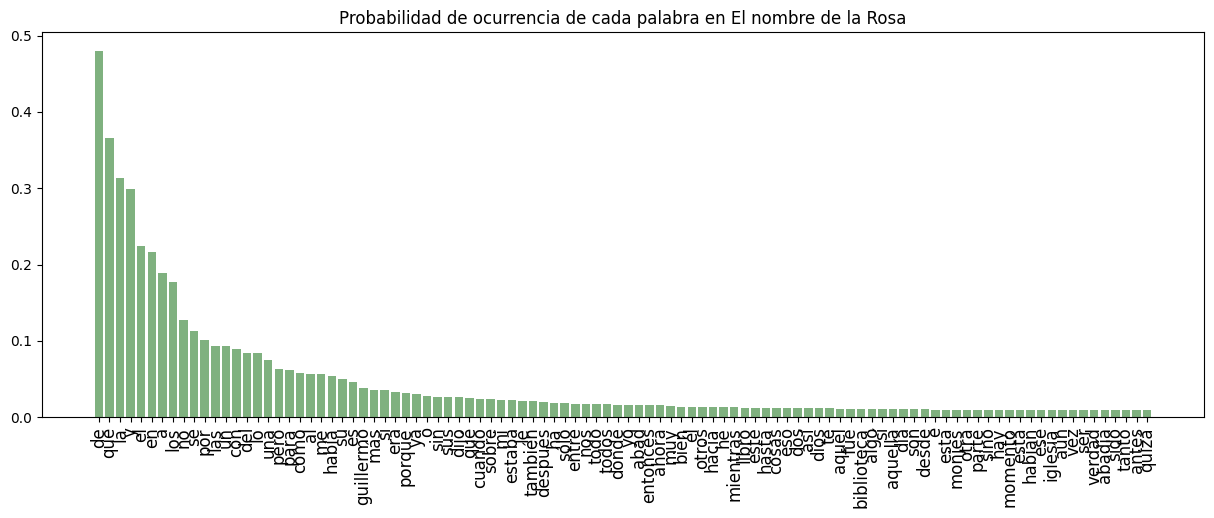

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(x, y, color="darkgreen", alpha=0.5)
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90, fontsize=12)
ax.set_title("Probabilidad de ocurrencia de cada palabra en El nombre de la Rosa")
plt.show()

## Generación de texto con distribución uniforme

Nos referimos a un enfoque donde cada palabra o token en un texto generado tiene la misma probabilidad de aparecer. En otras palabras, todas las palabras tienen una probabilidad uniforme de ser seleccionadas en cada paso del proceso de generación de texto.

Es un enfoque donde cada palabra o token en un texto generado tiene la misma probabilidad de aparecer. En otras palabras, todas las palabras tienen una probabilidad uniforme de ser seleccionadas en cada paso del proceso de generación de texto.

Cuando se trabaja con generación de texto, es común utilizar modelos probabilísticos que asignan una probabilidad a cada posible palabra en función del contexto y las palabras anteriores en la secuencia. En el caso de la distribución uniforme, estas probabilidades son iguales para todas las palabras, lo que significa que no hay preferencia por ninguna palabra en particular.

Este enfoque puede ser útil en situaciones donde se desea generar texto de manera completamente aleatoria o cuando no hay información contextual que favorezca la elección de ciertas palabras sobre otras. Sin embargo, en muchos casos, se prefieren modelos más sofisticados que capturan dependencias semánticas y sintácticas para generar texto más coherente y relevante.

In [18]:
words = []

#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
selected_word = vocabulary[np.random.randint(0, len(vocabulary))]
words.append(selected_word)

" ".join(words)

'iniciativa'

In [19]:
length = 10
for _ in range(length):
    selected_words = vocabulary[np.random.randint(0, len(vocabulary))]
    words.append(selected_words)

In [20]:
" ".join(words)

'iniciativa musité abriese practicados simple prisión círculo habla escuetamente contradicción alargaba'

Podríamos generar el mismo comportamiento de la siguiente manera:

In [21]:
" ".join(np.random.choice(vocabulary, length))

'jonás uía tronó filamentos impulsar torturaba reprimirse gritaron comenzaré tendría'

Si buscamos 100 palabras usando la variable donde guardamos el libro preprocesado (es decir 'nuestra población'):

In [22]:
" ".join(random.sample(book_processed.split(), 100))

'digo escombros describirte toda figura pregunta signo instantes y entonces viaje tendríamos pobreza y de a no debían presente aún a por se malaquías todos también sino parecía esto en emperador volúmenes parecida cuerpo un traté suerte junto dónde cerciorarse entonces y d del aterrorizado dijo os techo contrario con que porque legación clase salmo el extremo al ver parte he primero un d medio y dado fray naturaleza de que multicolor de los era subía separa alguno no se fratrem la que el curiosidad y en lograr estado de que la vivir arrancándole portal que un tuviese cuadro el'

### Generación de texto usando N-Gramas

#### Unigramas

In [23]:
print("Unigramas únicos: ", len(unigrams), end="\n\n")
unigrams.most_common(10)

Unigramas únicos:  20290



[('de', 9746),
 ('que', 7411),
 ('la', 6369),
 ('y', 6074),
 ('el', 4564),
 ('en', 4380),
 ('a', 3822),
 ('los', 3594),
 ('no', 2597),
 ('se', 2288)]

#### Bigramas

In [24]:
bigrams = Counter(obtain_ngrams(book_processed, 2))
print("Bigramas únicos: ", len(bigrams), end="\n")
bigrams.most_common(20)

Bigramas únicos:  99045


[(('de', 'la'), 1323),
 (('de', 'los'), 895),
 (('en', 'la'), 709),
 (('en', 'el'), 640),
 (('lo', 'que'), 544),
 (('a', 'la'), 505),
 (('que', 'se'), 395),
 (('de', 'las'), 387),
 (('a', 'los'), 378),
 (('que', 'no'), 339),
 (('de', 'que'), 317),
 (('que', 'el'), 293),
 (('por', 'la'), 285),
 (('por', 'el'), 262),
 (('de', 'un'), 239),
 (('y', 'el'), 232),
 (('que', 'la'), 222),
 (('y', 'la'), 219),
 (('y', 'de'), 212),
 (('el', 'abad'), 207)]

### Trigramas

In [25]:
trigrams = Counter(obtain_ngrams(book_processed, 3))
print("Trigramas únicos: ", len(trigrams), end="\n")
trigrams.most_common(30)

Trigramas únicos:  163799


[(('de', 'modo', 'que'), 109),
 (('de', 'lo', 'que'), 76),
 (('de', 'la', 'iglesia'), 71),
 (('a', 'través', 'de'), 63),
 (('en', 'aquel', 'momento'), 63),
 (('de', 'la', 'biblioteca'), 50),
 (('de', 'la', 'abadía'), 48),
 (('en', 'la', 'biblioteca'), 47),
 (('en', 'la', 'abadía'), 42),
 (('en', 'el', 'scriptorium'), 37),
 (('todo', 'lo', 'que'), 37),
 (('antes', 'de', 'que'), 36),
 (('al', 'mismo', 'tiempo'), 36),
 (('y', 'de', 'los'), 33),
 (('una', 'serie', 'de'), 32),
 (('a', 'los', 'que'), 31),
 (('y', 'en', 'el'), 31),
 (('en', 'todo', 'caso'), 31),
 (('en', 'la', 'cocina'), 31),
 (('que', 'en', 'la'), 30),
 (('de', 'la', 'naturaleza'), 30),
 (('la', 'idea', 'de'), 30),
 (('por', 'lo', 'que'), 30),
 (('en', 'la', 'iglesia'), 29),
 (('de', 'la', 'verdad'), 29),
 (('de', 'que', 'el'), 27),
 (('a', 'pesar', 'de'), 26),
 (('de', 'la', 'orden'), 26),
 (('cuenta', 'de', 'que'), 26),
 (('y', 'a', 'los'), 26)]

#### Generación de texto basado en probabilidad de ocurrencia

Este código está relacionado con un modelo de lenguaje probabilístico que utiliza un enfoque de n-gramas para calcular las probabilidades de ocurrencia de palabras en un texto y para seleccionar la siguiente palabra en una secuencia dada.

Aquí hay una explicación detallada de cada función:

* unigram_probability(token):
    Esta función calcula la probabilidad de una única palabra (unigrama) en función de su frecuencia en el conjunto de datos de entrenamiento.
    Utiliza el método get para obtener la frecuencia del unigrama del diccionario unigrams. Si la palabra no está en el diccionario, devuelve 0.
    La probabilidad se calcula dividiendo la frecuencia del unigrama entre la longitud del vocabulario.

* bigram_probability(sequence):
        Calcula la probabilidad de un bigrama (dos palabras consecutivas) en función de la frecuencia del bigrama y la frecuencia de la primera palabra en el bigrama.
        Maneja el caso de bigramas desconocidos o con la primera palabra desconocida utilizando un valor predeterminado de 1 para el denominador.

* trigram_probability(sequence):
        Calcula la probabilidad de un trigram (tres palabras consecutivas) utilizando la frecuencia del trigram y la frecuencia del bigrama que lo precede.
        Maneja el caso de trigramas desconocidos o con el bigrama desconocido utilizando un valor predeterminado de 1 para el denominador.

* generate_random_weights(num_weights):
        Genera pesos aleatorios que suman 1. Estos pesos se utilizan en la interpolación lineal para combinar las probabilidades de unigrama, bigrama y trigram.

* calculate_interpolated_probability(prob1, prob2, prob3, weights):
        Calcula la probabilidad interpolada utilizando pesos aleatorios. Combina las probabilidades dadas (prob1, prob2, prob3) con los pesos correspondientes.

* next_token(sequence):
        Esta función predice la siguiente palabra en una secuencia dada.
        Calcula las probabilidades de unigrama, bigrama y trigram para cada palabra en el vocabulario.
        Luego, utiliza la interpolación lineal con pesos aleatorios para combinar estas probabilidades.
        Devuelve la palabra candidata con la mayor probabilidad.

La función crea una lista de todas las palabras candidatas junto con sus probabilidades y devuelve la palabra con la mayor probabilidad.

Este tipo de modelo se utiliza comúnmente en tareas de generación de texto y predicciónde palabras siguientes, donde se desea predecir la siguiente palabra en función del contexto proporcionado por las palabras anteriores en la secuencia. La interpolación lineal permite combinar la información de diferentes órdenes de n-gramas para obtener una estimación más robusta de la probabilidad de la siguiente palabra.

In [26]:
def unigram_probability(token):
    return unigrams.get(token, 0) / len(vocabulary)


def bigram_probability(sequence):
    denominator = unigrams.get(sequence[0], 1)  # Handle unknown unigrams
    return bigrams.get(sequence, 0) / denominator


def trigram_probability(sequence):
    denominator = bigrams.get(sequence[:2], 1)  # Handle unknown bigrams
    return trigrams.get(sequence, 0) / denominator


def generate_random_weights(num_weights):
    # Generate random weights that sum up to 1
    weights = [random.uniform(0, 1) for _ in range(num_weights)]
    normalization_factor = sum(weights)
    return [w / normalization_factor for w in weights]


def calculate_interpolated_probability(prob1, prob2, prob3, weights):
    return sum(w * p for w, p in zip(weights, [prob1, prob2, prob3]))


def next_token(sequence):
    candidate_words = []

    for item in vocabulary:
        prob1 = unigram_probability(item)
        prob2 = bigram_probability((sequence[-1], item))
        prob3 = (
            trigram_probability((sequence[-2], sequence[-1], item))
            if len(sequence) >= 3
            else 0
        )

        # Generate random weights for interpolation
        random_weights = generate_random_weights(3)

        probability = calculate_interpolated_probability(
            prob1, prob2, prob3, random_weights
        )

        candidate_words.append((item, probability))

    candidate_words.sort(key=lambda x: x[1], reverse=True)
    return candidate_words[0][0]

In [27]:
words = []
#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
selected_word = vocabulary[np.random.randint(0, len(vocabulary))]
words.append(selected_word)

In [28]:
words

['moda']

In [29]:
length = 100
for _ in range(length - 1):
    word_selected = next_token(words)
    words.append(word_selected)

In [30]:
" ".join(words)

'moda de la que y que de la en de que la de que de de de que de que de la de la que de de de de la de de de y lo que de de y lo que de de de y lo que la de la de de que de que la la de la de la la de la de la de que y de la la de de de la de de y lo que y que que de que que y de y lo que de el y los que la de que'

Para evitar la repetición de la misma palabra en la salida, puede modificar la función next_token para excluir las palabras que ya se han utilizado en la secuencia.

In [31]:
def next_not_repeated_token(sequence):
    candidate_words = []

    for item in vocabulary:
        if item not in sequence:
            prob1 = unigram_probability(item)
            prob2 = bigram_probability((sequence[-1], item))
            prob3 = (
                trigram_probability((sequence[-2], sequence[-1], item))
                if len(sequence) >= 3
                else 0
            )

            random_weights = generate_random_weights(3)

            probability = calculate_interpolated_probability(
                prob1, prob2, prob3, random_weights
            )

            candidate_words.append((item, probability))

    candidate_words.sort(key=lambda x: x[1], reverse=True)
    return candidate_words[0][0]

In [32]:
words = []
#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
selected_word = vocabulary[np.random.randint(0, len(vocabulary))]
words.append(selected_word)

length = 100
for _ in range(length - 1):
    word_selected = next_not_repeated_token(words)
    words.append(word_selected)

" ".join(words)

'riquezas que los y de la a inicial en el del inquisidor no se por las al ponerse una un hurto aquella misma noche alguien lo había hecho su orden pero guillermo me miró con para como si es verdad he sido yo quien te ha dicho esta vez adso dijo mi maestro le encantaba deslumbrar era más alto miraba distraído tras ellos cuidando sin embargo también esa idea presentaba numerosos inconvenientes porque ya oíste cómo hablaba sus ojos actúa fraudulentamente qué donde cuando o sea razón después todos sederunt habiéndose disuelto así sobre todo caso aquí está prohibido respondió'

**Ejercicios:**

**Manejo de Secuencias Cortas:**

Asegúrate de que el modelo maneje de manera adecuada secuencias con menos de 3 palabras.
Sugerencia: Modifica el código para manejar adecuadamente las secuencias más cortas, ajustando las probabilidades según la longitud de la secuencia.

**Incorporación de N-gramas Superiores:**

Expande el modelo para incluir n-gramas superiores (por ejemplo, cuatrigramas).
Sugerencia: Añade funciones y ajusta el código para incluir n-gramas más largos en la interpolación lineal.

**Mejora de Eficiencia:**

Evalúa la eficiencia del código, especialmente para grandes conjuntos de datos. ¿Se pueden realizar mejoras?
Sugerencia: Considera el uso de estructuras de datos más eficientes y optimiza el código para manejar grandes volúmenes de datos.

**Smoothing y Manejo de Palabras Desconocidas:**

Sugerencia: Implementa técnicas de suavizado (smoothing) para manejar palabras desconocidas o n-gramas que no están en tu conjunto de datos de entrenamiento. Por ejemplo, puedes utilizar el suavizado de Laplace (Laplace)

**Uso de Embeddings de Palabras:**

Sugerencia: Introduce embeddings de palabras para representar mejor las relaciones semánticas entre las palabras. Esto podría mejorar la calidad de las predicciones.

**Consideración del Contexto Global:**

Sugerencia: En lugar de depender solo del contexto local (n-gramas anteriores), podrías considerar el contexto global del documento o incluso del corpus completo para mejorar la generación de texto.

![Colegio Bourbaki](./Images/Matematicas.png)

![Colegio Bourbaki](./Images/Contacto.png)